<a href="https://colab.research.google.com/github/phlorenzoni/DataScience_1/blob/main/Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Renda com Machine Learning
Este é um pequeno projeto de ciência de dados que desenvolvi durante o curso: [Machine Learning e Data Science com Python de A a Z](https://iaexpert.academy/cursos-online-assinatura/machine-learning-data-science-python-az/).  

O objetivo deste notebook é implementar e otimizar modelos de aprendizagem de máquina a fim de treinar minhas habilidades enquanto iniciante na carreira de ciência de dados.  
 
Informações sobre a base de dados: [Clique Aqui](https://archive.ics.uci.edu/ml/datasets/census+income)

Autor: Paulo Henrique Lorenzoni Filho.

## Importando Bibliotecas

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Exploração e Visualização dos Dados

In [231]:
dados=pd.read_csv('census.csv')
#dados=pd.read_csv('/content/drive/MyDrive/Curso de ML/census.csv')
dados.head() #Solicitando as 5 primeiras linhas do DataFrame

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [232]:
#Verificando Missing Values
dados.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [233]:
#Verificando o Target
print(np.unique(dados['income'],return_counts=True), 'iremos prever duas classes.')

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841])) iremos prever duas classes.


In [234]:
dados.shape

(32561, 15)

In [235]:
dados.describe()#Visualizando estatísticas referentes aos dados

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


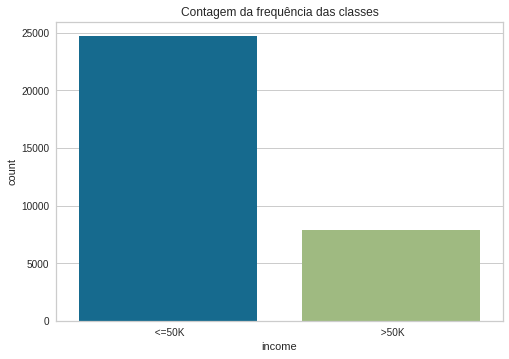

In [236]:
sns.countplot(x=dados['income']).set_title("Contagem da frequência das classes");

Verifica-se um desbalanço entre as classes acima. Aplicaremos os classificadores antes e depois da reamostragem para compararmos seu desempenho

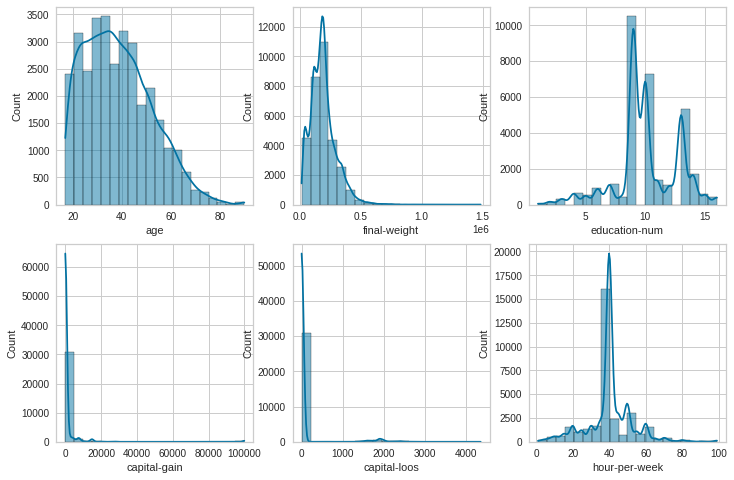

In [237]:
#Visualizando a distribuição de atributos previsores numéricos
n_rows=2
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((12, 8))

#Considerando as colunas previsoras 
df = dados.iloc[:,[0,2,4,10,11,12]]

for i, column in enumerate(df.columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = True, bins = 20);

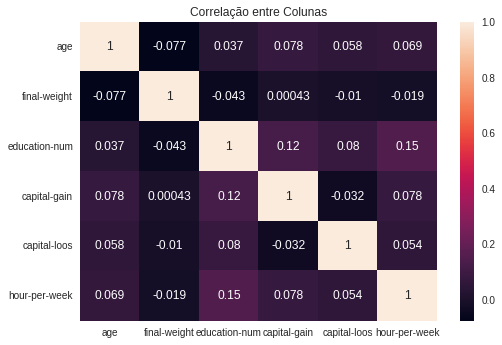

In [238]:
#Verificando as correlações
sns.heatmap(df.corr(), annot=True).set_title('Correlação entre Colunas');

In [239]:
#Workclass x Relationship x Age
px.treemap(dados, path=['workclass','relationship','age'])

In [240]:
# Education x Income
px.parallel_categories(dados, dimensions=['education','income'])

In [241]:
px.scatter_matrix(dados,dimensions=['education','age','education-num'], color='income')

## Tratamento de Strings
Utilizaremos o Label Encoder para transformar variáveis categóricas em numéricas.

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [243]:
#Selecionando os atributos preditivos e o Target
x=dados.iloc[:,0:14].values
y=dados.iloc[:,14].values

In [244]:
x[:,1] #Precisamos converter as strings em números, para isso utilizamos a classe LabelEncoder()

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [245]:
label_workclass=LabelEncoder()
x[:,1]=label_workclass.fit_transform(x[:,1])
x[:,1] #Agora faremos para os atributos restantes
    

array([7, 6, 4, ..., 4, 4, 5], dtype=object)

In [246]:
label_education=LabelEncoder()
label_marital=LabelEncoder()
label_occupation=LabelEncoder()
label_relationship=LabelEncoder()
label_race=LabelEncoder()
label_sex=LabelEncoder()
label_country=LabelEncoder()

x[:,3]=label_education.fit_transform(x[:,3])
x[:,5]=label_marital.fit_transform(x[:,5])
x[:,6]=label_occupation.fit_transform(x[:,6])
x[:,7]=label_relationship.fit_transform(x[:,7])
x[:,8]=label_race.fit_transform(x[:,8])
x[:,9]=label_sex.fit_transform(x[:,9])
x[:,13]=label_country.fit_transform(x[:,13])

Observando a coluna Workclass transformada em números, utilizarei o OneHotEnconder e o ColumnTransformer para que os atributos não tenham pesos diferentes. Entretanto, o número de colunas aumentará. Vejamos a seguir:

## Escalonamento do Sistema

In [247]:
x.shape #Antes do processamento

(32561, 14)

In [248]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [249]:
one_hotencoder=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')
x=one_hotencoder.fit_transform(x).toarray()

x.shape #Depois do processamento


(32561, 108)

 Observamos que as escalas estão desproporcionais. Sendo asssim, faz-se necessário uma padronização de escalas. Utilizarei a classe Standard Scaler.

In [250]:
x[:,[105,106,107]] #Amostragem não padronizada

array([[2.1740e+03, 0.0000e+00, 4.0000e+01],
       [0.0000e+00, 0.0000e+00, 1.3000e+01],
       [0.0000e+00, 0.0000e+00, 4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 4.0000e+01],
       [0.0000e+00, 0.0000e+00, 2.0000e+01],
       [1.5024e+04, 0.0000e+00, 4.0000e+01]])

In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
x=StandardScaler().fit_transform(x) #Padronizando os dados para não atrapalhar os algoritmos

In [253]:
x[:,[105,106,107]] #Amostragem padronizada

array([[ 0.1484529 , -0.21665953, -0.03542945],
       [-0.14592048, -0.21665953, -2.22215312],
       [-0.14592048, -0.21665953, -0.03542945],
       ...,
       [-0.14592048, -0.21665953, -0.03542945],
       [-0.14592048, -0.21665953, -1.65522476],
       [ 1.88842434, -0.21665953, -0.03542945]])

## Testes Iniciais SVM, Neural Net, DecisionTree
O tunning dos parâmetros foi realizado utilizando o GridSearch. Entretanto, optei por omitir neste notebook.

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [255]:
#Fragmentando os dados em treinamento e teste
x_treinamento,x_teste,y_treinamento,y_teste=train_test_split(x,y,test_size=0.15, random_state=0)


0.813510747185261

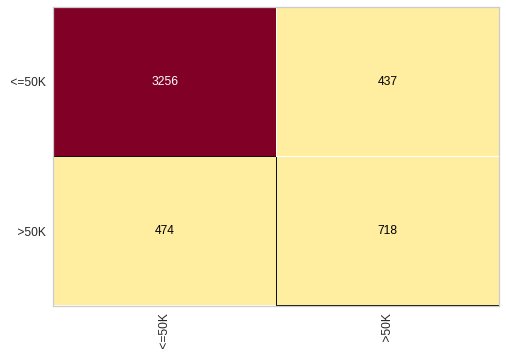

In [256]:
arvore_decisao=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1, min_samples_split=5,splitter='best')
arvore_decisao.fit(x_treinamento,y_treinamento)
previsoes=arvore_decisao.predict(x_teste)
cm=ConfusionMatrix(arvore_decisao)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [257]:
arvore_report=classification_report(y_teste,previsoes,output_dict=True) #Gerando um dicionario para compararmos no final
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.62      0.60      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



### SVM

0.8485158648925282

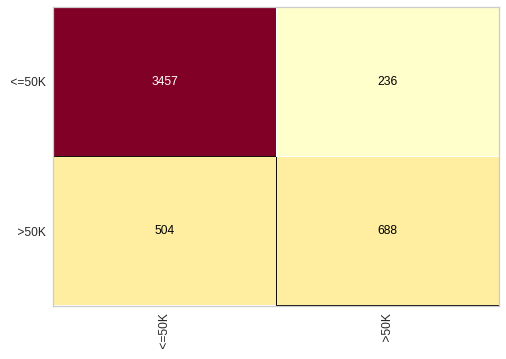

In [258]:
SVM=SVC(kernel='rbf',C=2.0)
SVM.fit(x_treinamento,y_treinamento)
previsoes=SVM.predict(x_teste)
cm=ConfusionMatrix(SVM)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [259]:
svm_report=classification_report(y_teste,previsoes,output_dict=True)
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.74      0.58      0.65      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



### Rede Neural 

0.8472876151484136

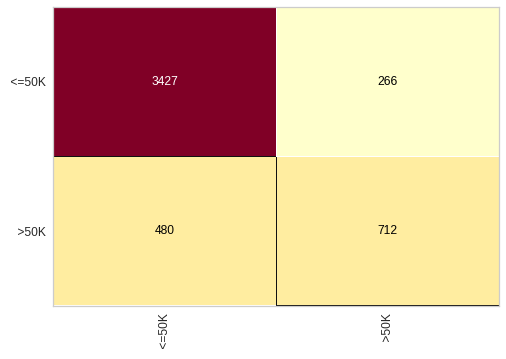

In [260]:
mlp=MLPClassifier(max_iter=1500, verbose=False, activation='relu',solver='adam',hidden_layer_sizes=(2,2),tol=0.0000100)
mlp.fit(x_treinamento,y_treinamento)
previsoes=mlp.predict(x_teste)
cm=ConfusionMatrix(mlp)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [261]:
mlp_report=classification_report(y_teste,previsoes,output_dict=True)
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.60      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



## Balanceamento de Classes
Faremos o balanceamento das classes utilizando sobreamostragem (SMOTE) para verificar se haverá melhora nos resultados.

In [262]:
from imblearn.over_sampling import SMOTE

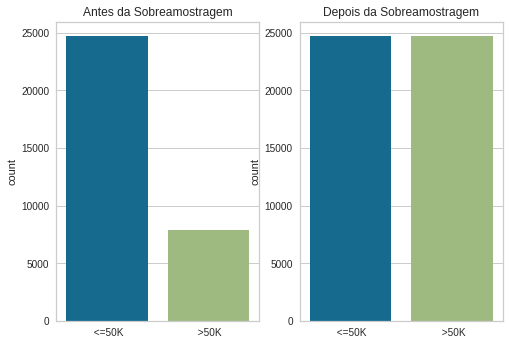

In [263]:
smote=SMOTE(sampling_strategy='minority') #Aumentamos o numero de registros da classe minoritaria
X,Y=smote.fit_resample(x,y)
#Visualizando o resultado
fig, axes = plt.subplots(nrows=1, ncols=2);
sns.countplot(x=y,ax=axes[0]).set_title('Antes da Sobreamostragem'); 
sns.countplot(x=Y,ax=axes[1]).set_title('Depois da Sobreamostragem'); 

## Testes Finais

In [264]:
x_treinamento,x_teste,y_treinamento,y_teste=train_test_split(X,Y,test_size=0.15, random_state=0) #Separando a nova base (Sobreamostragem)

### Arvore de Decisão - Com Sobreamostragem

0.8677184466019418

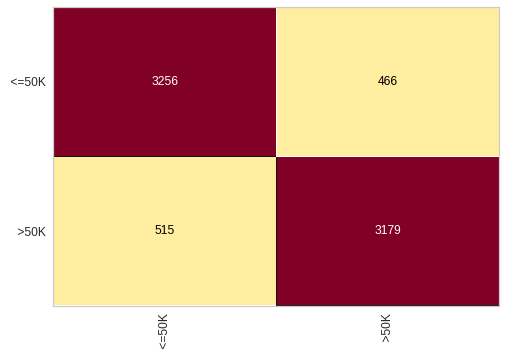

In [265]:
arvore_decisao=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1, min_samples_split=5,splitter='best')
arvore_decisao.fit(x_treinamento,y_treinamento)
previsoes=arvore_decisao.predict(x_teste)
cm=ConfusionMatrix(arvore_decisao)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [266]:
arvore_report_smote=classification_report(y_teste,previsoes, output_dict=True)
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.87      0.87      3722
        >50K       0.87      0.86      0.87      3694

    accuracy                           0.87      7416
   macro avg       0.87      0.87      0.87      7416
weighted avg       0.87      0.87      0.87      7416



### SVM - Com Sobreamostragem

0.8590884573894283

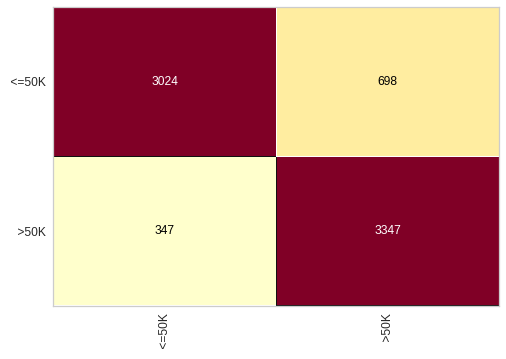

In [267]:
SVM=SVC(kernel='rbf',C=2.0)
SVM.fit(x_treinamento,y_treinamento)
previsoes=SVM.predict(x_teste)
cm=ConfusionMatrix(SVM)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [268]:
svm_report_smote=classification_report(y_teste,previsoes,output_dict=True)
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.81      0.85      3722
        >50K       0.83      0.91      0.86      3694

    accuracy                           0.86      7416
   macro avg       0.86      0.86      0.86      7416
weighted avg       0.86      0.86      0.86      7416



### Rede Neural - Com Sobreamostragem

0.8495145631067961

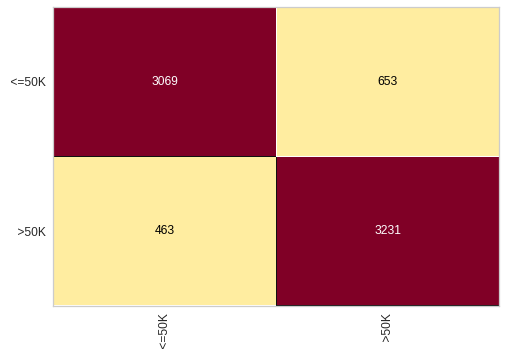

In [269]:
mlp=MLPClassifier(max_iter=1500, verbose=False, activation='relu',solver='adam',hidden_layer_sizes=(2,2),tol=0.0000100)
mlp.fit(x_treinamento,y_treinamento)
previsoes=mlp.predict(x_teste)
cm=ConfusionMatrix(mlp)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste, y_teste)

In [270]:
mlp_report_smote=classification_report(y_teste,previsoes,output_dict=True)
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.82      0.85      3722
        >50K       0.83      0.87      0.85      3694

    accuracy                           0.85      7416
   macro avg       0.85      0.85      0.85      7416
weighted avg       0.85      0.85      0.85      7416



## Comparação entre os Algoritmos com e sem Sobreamostragem


### Comparação entre Árvore de Decisão

In [271]:
pd.DataFrame(arvore_report).transpose()

,precision,recall,f1-score,support
<=50K,0.872922,0.881668,0.877273,3693.000000
>50K,0.621645,0.602349,0.611845,1192.000000
accuracy,0.813511,0.813511,0.813511,0.813511
macro avg,0.747284,0.742009,0.744559,4885.000000
weighted avg,0.811608,0.813511,0.812506,4885.000000


In [272]:
pd.DataFrame(arvore_report_smote).transpose()

,precision,recall,f1-score,support
<=50K,0.863431,0.874798,0.869078,3722.000000
>50K,0.872154,0.860585,0.866331,3694.000000
accuracy,0.867718,0.867718,0.867718,0.867718
macro avg,0.867793,0.867692,0.867704,7416.000000
weighted avg,0.867776,0.867718,0.867709,7416.000000


### Comparação entre SVM

In [273]:
pd.DataFrame(svm_report).transpose()

,precision,recall,f1-score,support
<=50K,0.872759,0.936095,0.903319,3693.000000
>50K,0.744589,0.577181,0.650284,1192.000000
accuracy,0.848516,0.848516,0.848516,0.848516
macro avg,0.808674,0.756638,0.776801,4885.000000
weighted avg,0.841484,0.848516,0.841575,4885.000000


In [274]:
pd.DataFrame(svm_report_smote).transpose()

,precision,recall,f1-score,support
<=50K,0.897063,0.812466,0.852672,3722.000000
>50K,0.827441,0.906064,0.864970,3694.000000
accuracy,0.859088,0.859088,0.859088,0.859088
macro avg,0.862252,0.859265,0.858821,7416.000000
weighted avg,0.862384,0.859088,0.858797,7416.000000


### Comparação entre Rede Neural

In [275]:
pd.DataFrame(mlp_report).transpose()

,precision,recall,f1-score,support
<=50K,0.877144,0.927972,0.901842,3693.000000
>50K,0.728016,0.597315,0.656221,1192.000000
accuracy,0.847288,0.847288,0.847288,0.847288
macro avg,0.802580,0.762644,0.779032,4885.000000
weighted avg,0.840755,0.847288,0.841908,4885.000000


In [276]:
pd.DataFrame(mlp_report_smote).transpose()

,precision,recall,f1-score,support
<=50K,0.868913,0.824557,0.846154,3722.000000
>50K,0.831874,0.874662,0.852732,3694.000000
accuracy,0.849515,0.849515,0.849515,0.849515
macro avg,0.850394,0.849609,0.849443,7416.000000
weighted avg,0.850463,0.849515,0.849430,7416.000000


## Combinação de Classificadores

In [277]:
#Selecionando um registro para previsão
novo_registro=x[0]
novo_registro=novo_registro.reshape(1,-1)
resposta_arvore=arvore_decisao.predict(novo_registro)
resposta_svm=SVM.predict(novo_registro)
resposta_rede_neural=mlp.predict(novo_registro)
print(resposta_arvore,resposta_svm,resposta_rede_neural)

[' <=50K'] [' <=50K'] [' <=50K']


In [278]:
#Criando uma estrutura condicional para decidir a resposta final baseado na maioria
maior50k=0 
menorigual50k=0
if resposta_arvore == '>50k':
  maior50k+=1
else:
    menorigual50k+=1

if resposta_svm=='>50k':
    maior50k+=1
else:
    menorigual50k+=1

if resposta_rede_neural=='>50k':
    maior50k+=1
else:
    menorigual50k+=1
if maior50k > menorigual50k:
  print('Renda prevista: > 50k')
else:
  print('Renda prevista: <= 50k')
  



Renda prevista: <= 50k


## Considerações Finais

Diante das etapas realizadas, verificamos que a resposta de um algoritmo pode ser significativamente melhorada selecionando os parâmetros adequados e procedimentos necessários, neste notebook, o balanceamento das classes.    
Sendo assim, resultados melhores podem ser obtidos utilizando cross-validation e outras técnicas. No entanto, optei por não utiliza-las por ser apenas um pequeno projeto com objetivo de treinar e estruturar os conhecimentos construídos.
